# Python_Playstore_DataAnalysis
Author: Rahul Padwani

**Importing Requriments**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
g_data = pd.read_csv('playstore-analysis.csv')
g_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# *Task 1 Data clean up – Missing value treatment*
**(a)  Drop records where rating is missing since rating is our target/study variable**

In [3]:
g_data.dropna(how='any', subset=['Rating'], axis=0, inplace = True)
g_data["Rating"].isnull().sum()

0

**(b) Check the null values for the Android Ver column.** 

(i)  Are all 3 records having the same problem? 

In [4]:
g_data["Android Ver"].isnull().sum()

3

In [6]:
g_data.loc[g_data['Android Ver'].isnull()] 
# Yes,all 3 records have the same problem ;all 3 have NaN values.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


(ii) Drop the 3rd record i.e. record for “Life Made WIFI …”

In [7]:
g_data.drop([10472], inplace = True)

In [8]:
g_data.loc[g_data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


(iii) Replace remaining missing values with the mode

In [9]:
g_data['Android Ver'].fillna(g_data['Android Ver'].mode()[0], inplace=True)
g_data['Android Ver'].isnull().sum()

0

**c. Current ver – replace with most common value**

In [10]:
g_data['Current Ver'].fillna(g_data['Current Ver'].mode()[0], inplace=True)
g_data['Current Ver'].isnull().sum()

0

# Task 2. Data clean up – correcting the data types
**a. Which all variables need to be brought to numeric types?**

In [11]:
#Reviews and installs columns are needed to be brought to numeric types.

**b. Price variable – remove $ sign and convert to float**

In [16]:
price = []
for i in g_data['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)
       

In [20]:
    g_data['Price']= price
    g_data['Price']= g_data['Price'].astype('float')
    g_data["Price"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9366, dtype: float64

**(c)  Installs – remove ‘,’ and ‘+’ sign, convert to integer** 

In [21]:
installs = []
for i in g_data['Installs']:
    installs.append(i.replace(',','').replace('+','').strip())

g_data['Installs']= installs
g_data['Installs']= g_data['Installs'].astype('int')

In [22]:
g_data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int32

**(d)  Convert all other identiﬁed columns to numeric**

In [23]:
g_data['Reviews']= g_data['Reviews'].astype('int')
g_data['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9366, dtype: int32

# Task 3 Sanity checks – check for the following and handle accordingly
**(a)Avg. rating should be between 1 and 5, as only these values are allowed on the play store.Are there any such records? Drop if so.**

In [25]:
x = g_data[g_data['Rating'] < 1] & g_data[g_data['Rating'] > 5]
x                                                              
#There are no such records where ratings are not between 1 and 5.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


**(b)  Reviews should not be more than installs as only those who installed can review the app. Are there any such records? Drop if so.**

In [26]:
y = g_data[g_data['Reviews'] > g_data['Installs']]
y

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [27]:
y1 = g_data[g_data['Reviews'] > g_data['Installs']].index
y2 = g_data.drop(labels=y1, inplace=True)
y2

# Task 4  Identify and handle outliers – 
**(a) Price column**

(i) Make suitable plot to identify outliers in price

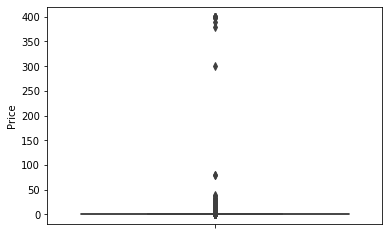

In [28]:
sns.boxplot(g_data['Price'] , orient = 'vertical')

**(a)(ii)   Do you expect apps on the play store to cost $200? Check out these cases**

In [30]:
g_data[g_data['Price'] > 200]

#Yes we can expect the price of the app to be more than $200.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


**(a)(iii)  After dropping the useless records, make the suitable plot again to identify outliers**

In [31]:
price_200 = g_data[g_data['Price'] > 50].index
g_data.drop(labels=price_200, inplace=True)

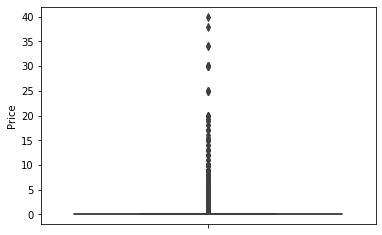

In [32]:
sns.boxplot(g_data['Price'] , orient = 'vertical')

**(a)(iv)    Limit data to records with price < $30**

In [33]:
price_30 = g_data[g_data['Price'] > 30].index
g_data.drop(labels=price_30, inplace=True)
p_30 = g_data['Price']>30
p_30.sum()

0

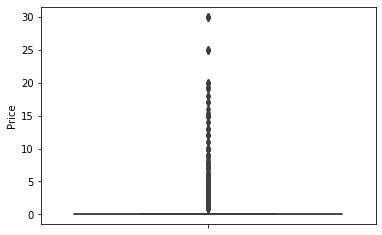

In [34]:
sns.boxplot(g_data['Price'] , orient = 'vertical')

**(b) Reviews column** 

(i) Make suitable plot

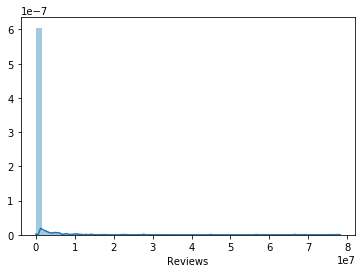

In [35]:
sns.distplot(g_data['Reviews'] , bins = 50)

(b)(ii) Limit data to apps with < 1 Million reviews

In [36]:
review_1m = g_data[g_data['Reviews'] > 1000000].index
g_data.drop(labels=review_1m, inplace=True)

In [37]:
r_1m = g_data['Reviews'] > 1000000
r_1m.sum()

0

**(c)  Installs**

(i) What is the 95th percentile of the installs?

In [39]:
install_p = g_data['Installs'].quantile(0.95)
install_p

10000000.0

(c)(ii)  Drop records having a value more than the 95th percentile

In [40]:
install_percentile = g_data[g_data['Installs'] > install_p].index
g_data.drop(labels=install_percentile, inplace=True)

In [41]:
ins_percentile = g_data['Installs'] > install_p
ins_percentile.sum()

0

 # **Task 5  What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?**


(a)  How do you explain this? 

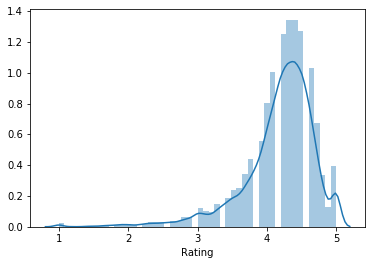

In [42]:
sns.distplot(g_data['Rating'] , bins = 50)

In [43]:
print(g_data['Rating'].skew())

-1.7434270330647985


In [46]:
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(g_data.Rating.median(),g_data.Rating.mean()))
#As mean is less than median, it proves that the distribution is negatively skewed.

The Median of this distribution 4.3 is greater than mean 4.170800237107298 of this distribution


(b) What is the implication of this on your analysis?

In [47]:
g_data['Rating'].mode()

#As mode >= median > mean, so the distribuition of rating is more skewed towards lower values.

0    4.3
dtype: float64

# Task 6  What are the top Content Rating values?
(a)  Are there any values with very few records? 

In [48]:
g_data['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

(b)  If yes, drop those as they won’t help in the analysis 

In [49]:
content = []

for i in g_data['Content Rating']:
    content.append(i.replace('Adults only 18+','Null').replace('Unrated','Null'))

g_data['Content Rating'] = content

In [50]:
content_rating = g_data[g_data['Content Rating'] == 'Null'].index
g_data.drop(labels = content_rating , inplace = True) 

In [51]:
c_rating = g_data['Content Rating'].value_counts()
c_rating

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

# Task 7  Effect of size on rating
(a)  Make a joinplot to understand the effect of size on rating 

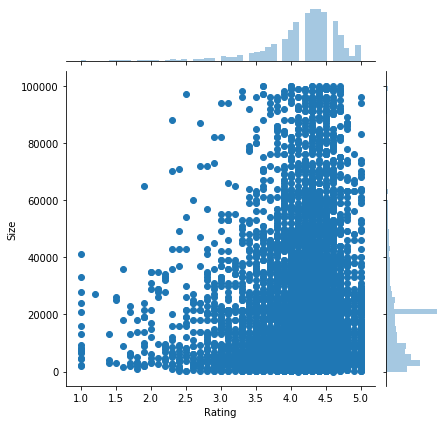

In [52]:
sns.jointplot(x ='Rating', y ='Size' , data = g_data , kind = 'scatter')

(b)  Do you see any patterns?

In [54]:
# Yes, size and rating have patterns between them

(c)  How do you explain the pattern?

In [55]:
#As per the plot, in most of the cases it can be seen that with increase in rate,size is also increasing.
# Hence it can be concluded that size and rating are co-related to each other positively.

# Task 8 Effect of price on rating
(a)  Make a jointplot (with regression line) 

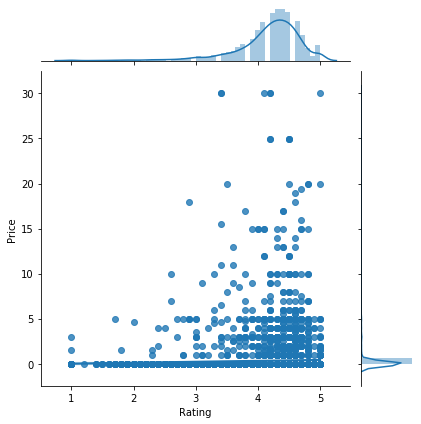

In [56]:
sns.distributions._has_statsmodels = False
sns.jointplot(x ='Rating', y ='Price', data = g_data, kind = 'reg')

(b)  What pattern do you see? 


In [57]:
#A pattern is observed that when price is increasing then rating gets almost constant after 4.

(c) How do you explain the pattern?

In [58]:
g_data.corr()
#From the pattern it can be said size and rating are positively co-related to one another.

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


(d)  Replot the data, this time with only records with price > 0 

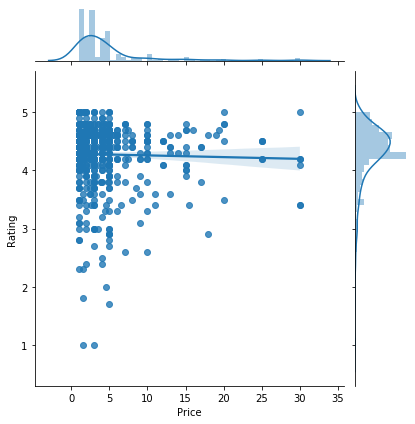

In [59]:
price_zero = g_data.loc[g_data['Price'] > 0]
sns.jointplot(x='Price', y='Rating', data = price_zero, kind='reg')

(e)  Does the pattern change?

In [60]:
price_zero.corr()
#The pattern changes weakly. Positive-corelation of size and rating slightly becomes negatively corelated.

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.095986,0.117943,0.063960,-0.025975
Reviews,0.095986,1.000000,0.163959,0.787628,-0.049764
Size,0.117943,0.163959,1.000000,0.119255,0.024912
Installs,0.063960,0.787628,0.119255,1.000000,-0.057710
Price,-0.025975,-0.049764,0.024912,-0.057710,1.000000


(f)  What is your overall inference on the effect of price on the rating 

In [61]:
#Thus, it can be said that with higher price,rating is also high but is almost constant
#when rating value is more than 4.

# Task 9  Look at all the numeric interactions together – 
  (a) Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

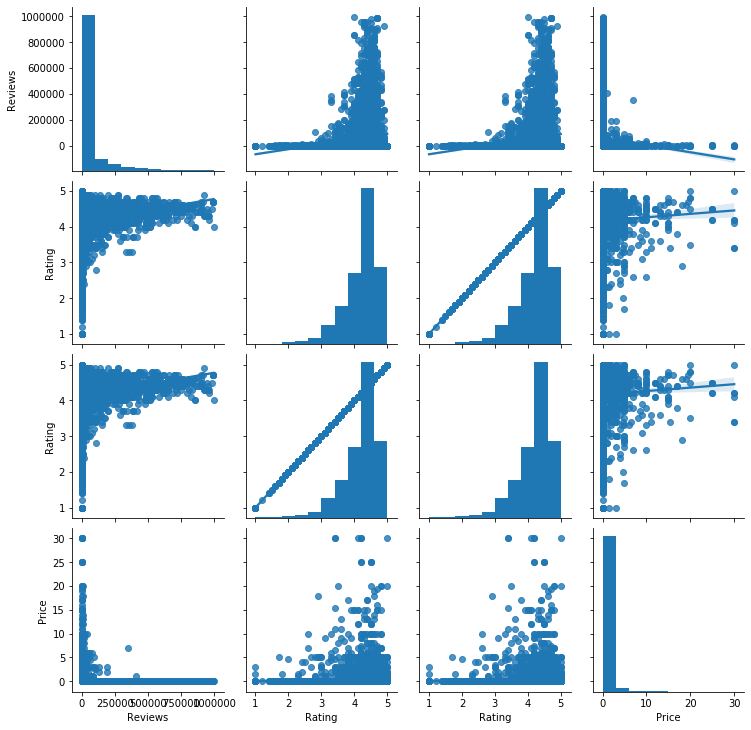

In [65]:
sns.pairplot(g_data, vars=['Reviews', 'Rating', 'Rating', 'Price'], kind='reg')

# Task(10) Rating vs. content rating
(a)  Make a bar plot displaying the rating for each content rating 

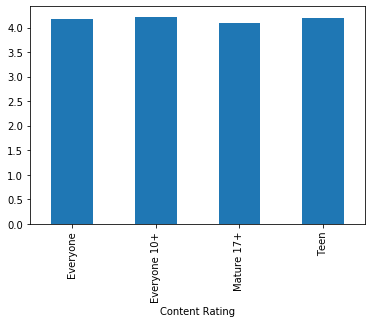

In [66]:
g_data.groupby('Content Rating').Rating.mean().plot.bar()

(b) Which metric would you use? Mean? Median? Some other quantile? 

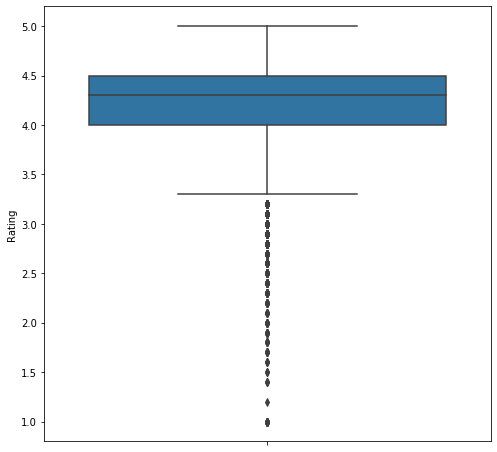

In [68]:
plt.figure(figsize = (8,8))
sns.boxplot(g_data['Rating'] , orient = 'vertical')
#we should use median as we have outliers in rating and median is the best way to use for outliers.

(c)  Choose the right metric and plot 

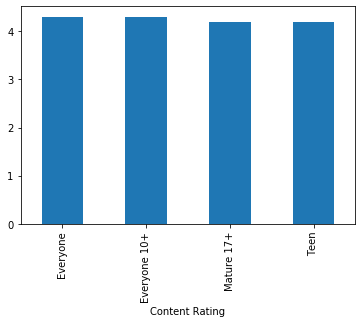

In [69]:
g_data.groupby('Content Rating').Rating.median().plot.bar()

# Task 11 Content rating vs. size vs. rating – 3 variables at a time
(a) Create 5 buckets (20% records in each) based on Size

In [70]:
bins = [0, 20000, 40000, 60000, 80000, 100000]
g_data['Bucket'] = pd.cut(g_data['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pivot = pd.pivot_table(g_data, values='Rating', index='Bucket', columns='Content Rating')
pivot

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


(b) By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [71]:
pivot1 = pd.pivot_table(g_data, values='Rating', index='Bucket', columns='Content Rating', 
                        aggfunc=lambda x:np.quantile(x,0.2))
pivot1

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


# (c)  Make a heatmap of this 
**(i)  Annotated**

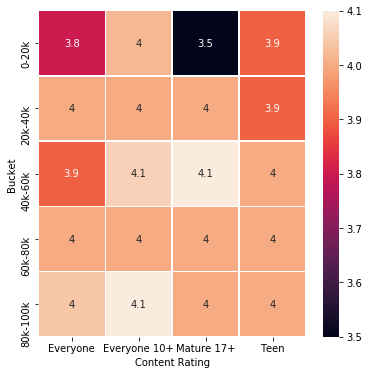

In [72]:
plt.figure(figsize = (6,6))
sns.heatmap(pivot1, annot=True,linewidths=.3)

**(c)(ii) Greens color map** 

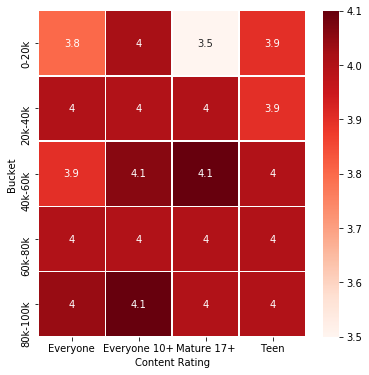

In [81]:
plt.figure(figsize = (6,6))
sns.heatmap(pivot1, annot=True, cmap = 'Reds' , linewidths=.3)

**(d) What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?**

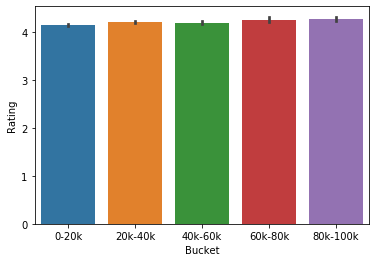

In [90]:
sns.barplot(x = g_data['Bucket'] , y = g_data['Rating'])